## Intermediate Data Science

#### University of Redlands - DATA 201
#### Author: Jesus Plascencia 
#### Purpose: To practice time series and visualize time trends. 

---------------
## Time Series Data - Day9 HW

**Idea from DATAQUEST** 
- Author = Jennifer Walker
- Environmental scientist / data geek / Python evangelist.

Open Power System Data (OPSD) for Germany:

Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh). The columns of the data file are:

- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh

Below I have added some prompts to lead you through the timeseries analysis.


Your final notebooks should:

- [ ] Be a completely new notebook with just the Day9 stuff in it NO YOU TRY: Read in the data, make the plots. Make sure to discuss what you see and comment on why your plots are great!
- [ ] Be reproducible with junk code removed.
- [ ] Have lots of language describing what you are doing, especially for questions you are asking or things that you find interesting about the data. Use complete sentences, nice headings, and good markdown formatting: https://www.markdownguide.org/cheat-sheet/
- [ ] It should run without errors from start to finish.

**Remember to Proof Read and Proof Run your code** Restart the kernel and go through it all once before submitting.

In [17]:
# Some basic package imports
import os
import numpy as np
import pandas as pd

# Visualization packages
import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'
import seaborn as sns

In [19]:
from datetime import datetime

In [21]:
df = pd.read_csv('data/opsd_germany_daily.csv', parse_dates = True, index_col=0)
df

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


## Data Basics and Preparation

Here you get some basic familiarity with the data:

- run stats on each of the variables
- count nans in each column
- look at the data types
- double check that you understand the variables and their units
- what is the date range and frequency
- add columns to the data set: Year, Month, and Weekday Name

There are three variables Consumptino, Wind, Solar, and Wind+Solar. Along with these columns there is also a DateTime Index. When looking at the .describe() of each variable I dont notice anything out of the ordinary. For NaN values, there does seem to be a large sum of NaN values for Wind, Solar, and Wind+Solar which is concerning. We have around 4383 datetime entires, so perhaps some measurements are taken yearly as opposed to monthly, and so on. Each variable is correctly specified with our variables being floats and the datetime index converted to a datetime64. This data tracks production in GWh. We also know that the date range id 2006-01-01 from 2017-12-31 and it in in Daily frequency.

In [24]:
print(list(df.columns))

['Consumption', 'Wind', 'Solar', 'Wind+Solar']


In [119]:
df.describe()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
count,4383.000000,2920.000000,2188.000000,2187.000000,4383.000000,4383.000000,4383.000000
mean,1338.675836,164.814173,89.258695,272.663481,2011.500342,6.522930,15.729637
std,165.775710,143.692732,58.550099,146.319884,3.452347,3.449097,8.801096
min,842.395000,5.757000,1.968000,21.478000,2006.000000,1.000000,1.000000
25%,1217.859000,62.353250,35.179250,172.185500,2008.500000,4.000000,8.000000
50%,1367.123000,119.098000,86.407000,240.991000,2012.000000,7.000000,16.000000
75%,1457.761000,217.900250,135.071500,338.988000,2014.500000,10.000000,23.000000
max,1709.568000,826.278000,241.580000,851.556000,2017.000000,12.000000,31.000000


In [28]:
df.isna().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
dtype: int64

In [30]:
df.dtypes

Consumption    float64
Wind           float64
Solar          float64
Wind+Solar     float64
dtype: object

In [32]:
df.index #added this to the HW to remind myself that we used index = 0

DatetimeIndex(['2006-01-01', '2006-01-02', '2006-01-03', '2006-01-04',
               '2006-01-05', '2006-01-06', '2006-01-07', '2006-01-08',
               '2006-01-09', '2006-01-10',
               ...
               '2017-12-22', '2017-12-23', '2017-12-24', '2017-12-25',
               '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29',
               '2017-12-30', '2017-12-31'],
              dtype='datetime64[ns]', name='Date', length=4383, freq=None)

In [34]:
#Min Years and Max Years
print(f'Start: {df.index.min()}\nEnd: {df.index.max()}')

Start: 2006-01-01 00:00:00
End: 2017-12-31 00:00:00


In [36]:
#Frequency 

pd.infer_freq(df.index) #Recorded Daily

'D'

In [38]:
# add columns to the data set: Year, Month, and Weekday Name

df['Year'] = df.index.year
df['Month'] = df.index.month
df['Weekday_name'] = df.index.day_name()
df.head(10)

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday_name
Date,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday
2006-01-06,1403.427,NaN,NaN,NaN,2006,1,Friday
2006-01-07,1300.287,NaN,NaN,NaN,2006,1,Saturday
2006-01-08,1207.985,NaN,NaN,NaN,2006,1,Sunday
2006-01-09,1529.323,NaN,NaN,NaN,2006,1,Monday


## Data Exploration - Basic Visualization

Start to make plots and see if you can generate some questions about the data. Make sure that you make observations about each plot - say what you see and what it means in terms of the data.

- Plot the overall consumption over time.

After plotting overall consumptino. We can see that consumption is relatively stable throughout the year. It does slightly increase throughout the years. What I did notice is that consumption spikes up every year, likely representing consumption increasing during winter or during summer. The mean line shows us that consumption is relatively stable but from 2010 to 2014 there may have been strides in energy that caused energy consumption to decrease (likely due to efficiency). Overall, there is seasonality in this visual. 

- Plot the wind and solar consumption over time.

As for wind consumption we do see that we have missing data for our rolling (mean) line. Overall from 2013 to 2018 we clearly see an upward trend in energy consumption which menas that Germanys Wind and solar consumption increased throughout this time. As for daily fluctuations we can see that some days expereince more energy consumption that others hinting towards seasonal differences. 

- Choose a focal year and redo the plots to look at variability over the year.

I chose 2015 as my focus year and what I notices is that consumption is highest in January and December when temperature is considerably colder. Consumption drops in warmer months which was surprising but it may hint towards a broader disliking to cooler temperatures. In other words, individuals may be more tolerant to warmer temperatures than they are for colder temperatures. We are also missing data for our rolling line. The rolling line shows us that there is a smooth decline mid year and a slight increase towards the end of the year. 

- Redo this for a focal month

For the focal month I chose May, my bday month. What was cool to note is that we were missing data for the rolling mean. Beyond that, I noticed that there was an upward trend for consumption as we progressed throughout the years for the month of May. Overall, May seems to be relatively stable and shows no significant trends for consumption levels GWh. 

Text(0, 0.5, 'Consumption')

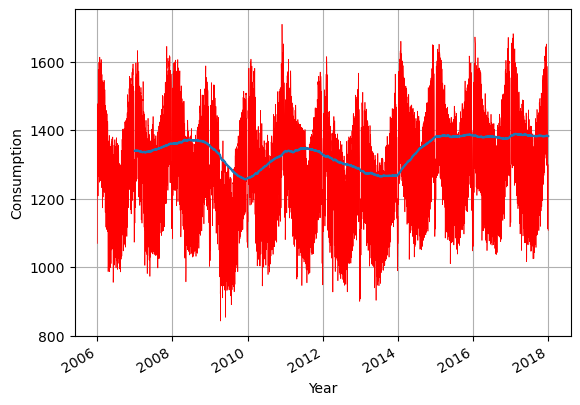

In [41]:
#Plot Overall Consumption over time
plt.plot(df.index,df['Consumption'],'r-',linewidth=.5)
df['Consumption'].rolling(365).mean().plot()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Consumption')


Text(0, 0.5, 'Wind and Solar Consumption')

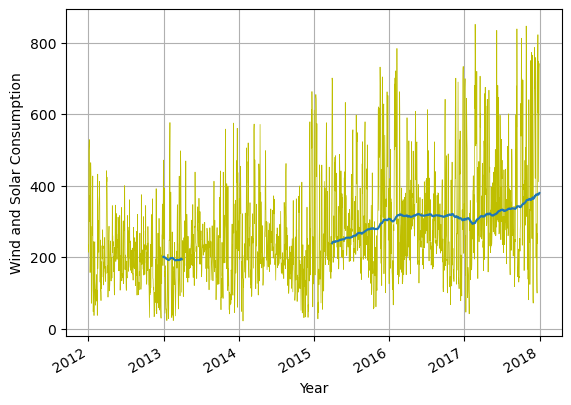

In [42]:
#Plot the wind and solar consumption over time.
plt.plot(df.index,df['Wind+Solar'],'y-',linewidth=.5)
df['Wind+Solar'].rolling(365).mean().plot() #Theirs a gap
plt.grid()
plt.xlabel('Year')
plt.ylabel('Wind and Solar Consumption')

Text(0, 0.5, 'Consumption')

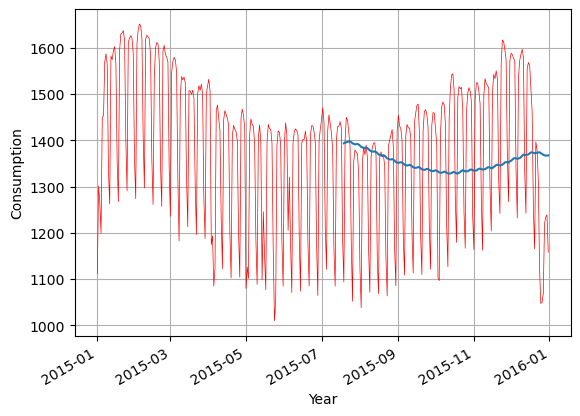

In [44]:
#Choose a focal year and redo the plots to look at variability over the year.
year_of_focus = 2015
filter = df.index.year == year_of_focus #We indexed years to plot
df_year = df[filter]

plt.plot(df_year.index,df_year['Consumption'],'r-',linewidth=.5)
df_year['Consumption'].rolling(200).mean().plot()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Consumption')


Text(0, 0.5, 'Wind and Solar Consumption')

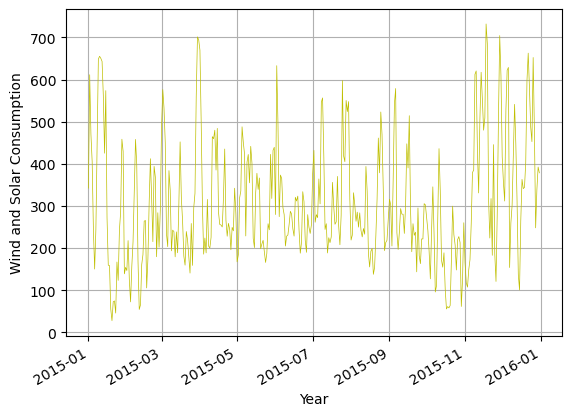

In [45]:
#2015 Wind solar consumption 
plt.plot(df_year.index,df_year['Wind+Solar'],'y-',linewidth=.5)
df_year['Wind+Solar'].rolling(365).mean().plot() #Theirs a gap
plt.grid()
plt.xlabel('Year')
plt.ylabel('Wind and Solar Consumption')

Text(0, 0.5, 'Consumption')

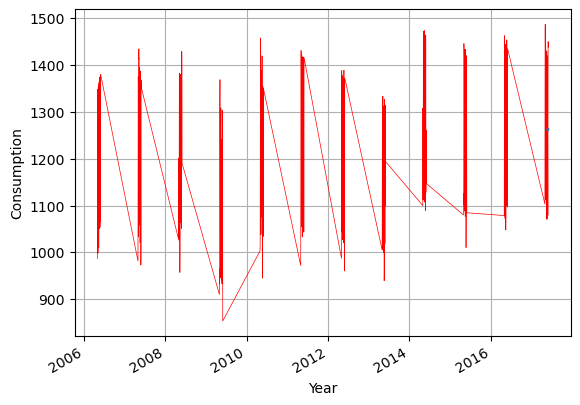

In [47]:
#Redo this for a focal month
month_of_focus = 5 #My Bday Month
filter2 = df.index.month == month_of_focus #We indexed years to plot
df_month = df[filter2]

plt.plot(df_month.index,df_month['Consumption'],'r-',linewidth=.5)
df_month['Consumption'].rolling(365).mean().plot()
plt.grid()
plt.xlabel('Year')
plt.ylabel('Consumption')


Text(0, 0.5, 'Wind and Solar Consumption')

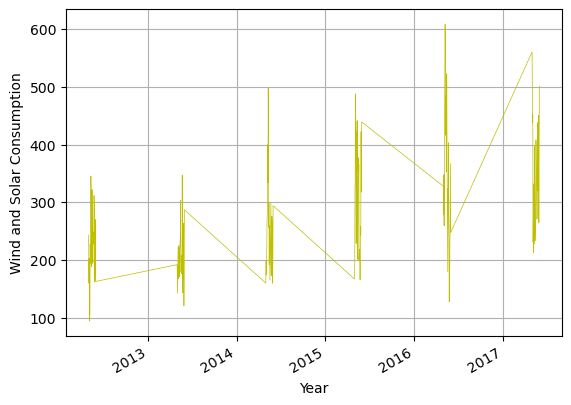

In [49]:
#May Wind solar consumption 
plt.plot(df_month.index,df_month['Wind+Solar'],'y-',linewidth=.5)
df_month['Wind+Solar'].rolling(365).mean().plot() #Theirs a gap
plt.grid()
plt.xlabel('Year')
plt.ylabel('Wind and Solar Consumption')

## Further Exploration

Now continue exploring the data to see what you can find out. Remember to explain what you are learning from each graph or calculation. Add guiding words in markdown to talk about what your code should be doing and why.

- How does seasonality effect the energy consumption? Consider the consumption grouped on a monthly basis. You could look at max, min, mean, etc. Make an interesting plot of this data (bar plot, box plot, etc). What do you learn?

This represents the average monthly consumption to show how seasonability affects GWh levels. It is extremely clear that the month with the highest average consumption is February, followed by nobember and December. After looking at the effect of energy consumption I can clearly see a dip in energy levels for the middle months, with explains why in our previous visuals we saw a rolling mean decrease then recover towards the end of the month. This U shape is expected because I expect consumption to increase in colder months when individuals are trying to stay warm. Overall usage is higher in colder months, and lower in the summer which suggest that temperature is extremely important for predicting consumption. (potential ML exploration). So warmer months require less energy and colder months require more energy.

When looking at Wind+ Solar consumption it is very clear that individuals substantially increase consumption towards the end of the year (December). There seems to be an increase in consumption from months 1 to 6 then a sharp decrease from months 6 to 10. In colder months (10 and beyond) energy consumption in Germany increases. To do this all we did was create an index of the month which we used to group our consumption and our wind+solar. We then took a mean (this is extremely important, if we dont take a mean we get a crazy graph). Following this we use a simple plt function where we input our X and Y variables. Note This same process if followed for the next question except for months we use day. 

- How does the day of the week change energy consumption?

On Average, we can see that towards the end of a given month energy consumption tends to decrease, and towards the beginning of the month it tends to increase. I assume that this is because individuals are much more willing to consume energy when they feel most secure. When energy consumption spikes, it is towards the middle of the month which is when many individuals recieve paychecks. I believe this behavior attributes to what I am seeing visually. 

- Using downsampling, plot on the same graph the daily (original data) and the average weekly (downsampled data) consumption for both solar and wind.

**I included commentary above the plot.**


- Using downsampling plot the yearly rolling average of both wind and solar consumption.

**I included commentary above the plot.**


- See if you can come up with a really cool graph of your own!

 **I included commentary above the plot.**


To assess how seasonality affects the energy consumption I first create my df[month] using the index.month functino. From here I'll then groupby month and consumption. What I found was that for average consumption their seems to be shar increases in the Months February and November. These seasonal increases indicate that consumers energy consumption drastically increases when its cooler/warmer. 

Text(0, 0.5, 'Average Consumption')

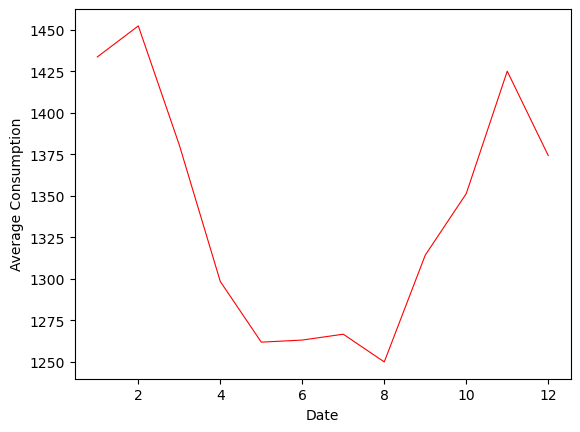

In [55]:
#How does seasonality effect the energy consumption?
df['Month'] = df.index.month
monthly_means = df[["Consumption" , "Wind+Solar"]].groupby(by=df['Month']).mean() # Note* During AEASP I did not visualize properly B/C I did not average

plt.plot(monthly_means.index, monthly_means['Consumption'],'r-', linewidth = .8)
plt.xlabel('Date')
plt.ylabel('Average Consumption')


Text(0, 0.5, 'Average Wind+Solar Consumption')

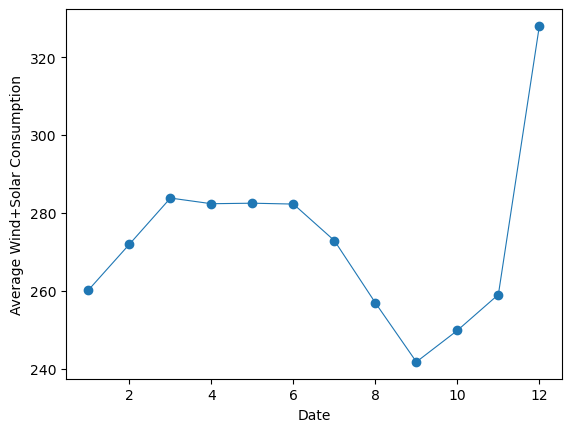

In [57]:
#Average wind+solar Consumption 
monthly_means = df[["Consumption" , "Wind+Solar"]].groupby(by=df['Month']).mean()

plt.plot(monthly_means.index, monthly_means['Wind+Solar'],'o-', linewidth = .8)
plt.xlabel('Date')
plt.ylabel('Average Wind+Solar Consumption')


**How does the day of the week change energy consumption?**

It seems that energy consu,ption increases towards the middle of a given month. That could be because energy consumers are recieving paychecks during this time. As savings become scarce towards the end of the month we see a sharp decline in energy consumption. This possible mean that our data is biased towards individuals who are financially distressed. 

Text(0, 0.5, 'Daily Average Consumption')

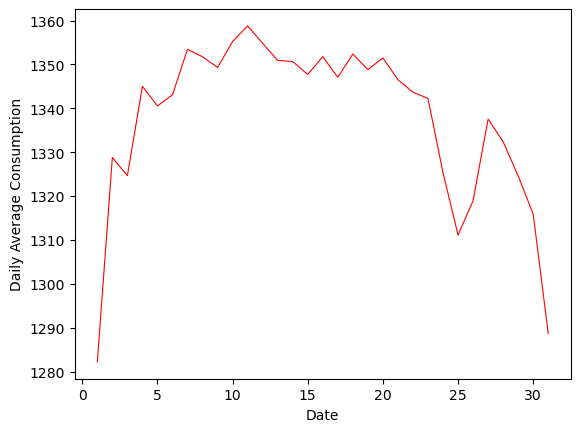

In [60]:
df['Day'] = df.index.day
daily_means = df[["Consumption" , "Wind+Solar"]].groupby(by=df['Day']).mean() # Note* During AEASP I did not visualize properly B/C I did not average

plt.plot(daily_means.index, daily_means['Consumption'],'r-', linewidth = .8)
plt.xlabel('Date')
plt.ylabel('Daily Average Consumption')


**Using downsampling, plot on the same graph the daily (original data) and the average weekly (downsampled data) consumption for both solar and wind.**

An import note is that solar and wind enegy is missing values for 2006 - 2011. Visually, for weekly consumption there is a lot of noise possible due to the weekly variation. Lines that look dark hint towards some seasonality, but it is somewhat difficult to pinpoint because of the apparent volatility in energy consumption. Wind and solar consumption are evidently missing 2006 and 2011 data. Wind and Solar consumption show a clear upward trend meaning that adoption for solar and wind has become increasingly widespread. 


Text(0, 0.5, 'Weekly Average Consumption')

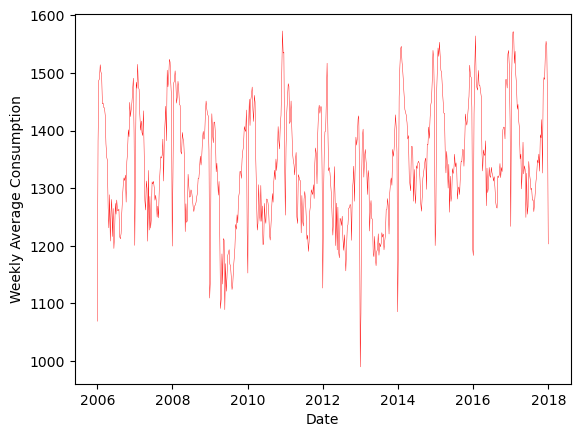

In [63]:
cols = ['Consumption', 'Wind+Solar']
sample = df[cols].resample('W').mean()

plt.plot(sample.index, sample['Consumption'],'r-', linewidth = .3)
plt.xlabel('Date')
plt.ylabel('Weekly Average Consumption')


Text(0, 0.5, 'Weekly Average Wind and Solar Consumption')

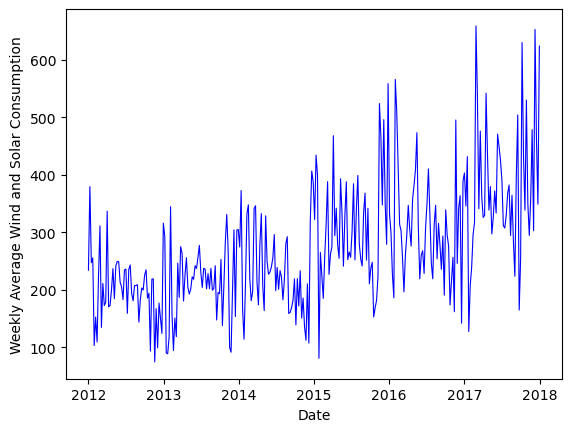

In [65]:
sample2 = df[cols].resample('W').mean()

plt.plot(sample.index, sample['Wind+Solar'],'b-', linewidth = .8)
plt.xlabel('Date')
plt.ylabel('Weekly Average Wind and Solar Consumption')


**Using downsampling plot the yearly rolling average of both wind and solar consumption.**

When looking at the yearly data, trends for wind and solar energy become increasingly clear. Their is an upward trend for solar and wind energy as the years progress. Specifically, 2015 is where wind and solar energy consumption experienced a sharp increase. For average consumption, everything seems to look stable, with slight fluctuations for a given year. 


Text(0, 0.5, 'Yearly Average Consumption')

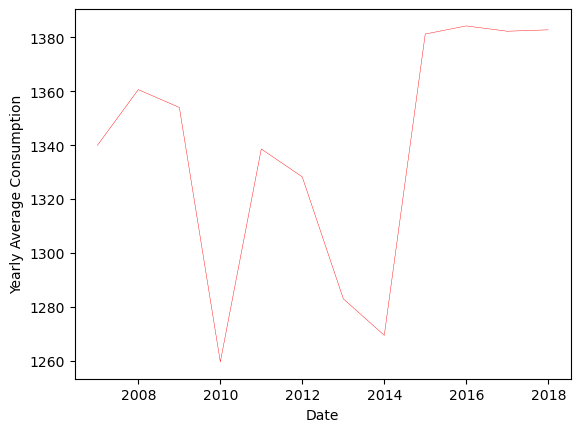

In [68]:
cols = ['Consumption', 'Wind+Solar']
sample2 = df[cols].resample('YE').mean()

plt.plot(sample2.index, sample2['Consumption'],'r-', linewidth = .3)
plt.xlabel('Date')
plt.ylabel('Yearly Average Consumption')

Text(0, 0.5, 'Yearly Average Consumption')

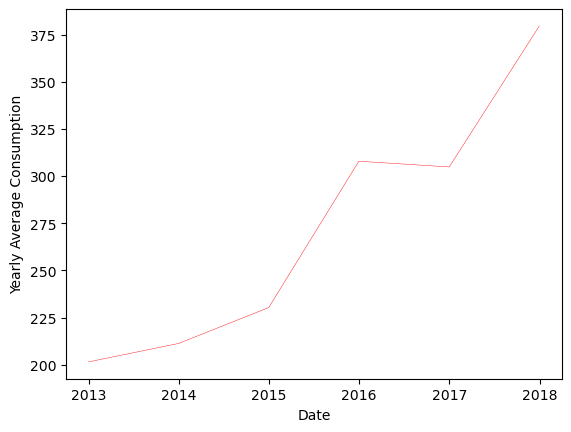

In [70]:
plt.plot(sample2.index, sample2['Wind+Solar'],'r-', linewidth = .3)
plt.xlabel('Date')
plt.ylabel('Yearly Average Consumption')

 **See if you can come up with a really cool graph of your own!**

I really love how easy seaborn is so I wanted to use their free [heatmap visuals](https://seaborn.pydata.org/generated/seaborn.heatmap.html) I used their function and got the correlation of variables I am interested in. I wanted to create a heat map where the higher the value the greater the correlation between two factors. I was very interested in consumption and solar energy and found that there was a slight negative correlation of -0.28. This indicates that when solar energy riss, consumption tends to decrease slightly. This 


The correlation between energy consumption and solar generation is –0.28, indicating a weak negative relationship. This suggests that when solar output rises, overall consumption tends to fall slightly, though the effect is not strong — implying that consumption patterns depend on additional factors beyond just solar availability.



Text(0.5, 1.0, 'Correlation between Consumption, Wind, and Solar')

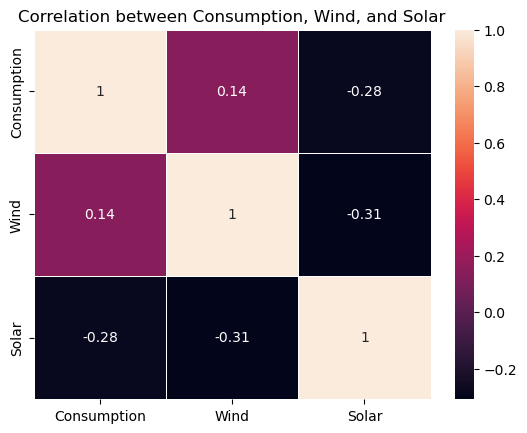

In [107]:
glue = df[['Consumption','Wind' , 'Solar']].corr()
sns.heatmap(glue, annot=True, linewidth=.5, cmap='rocket')
plt.title('Correlation between Consumption, Wind, and Solar')

#Whats so impressive about this graph is how EASY it is to connect different concepts! 

## Conclusion

Overall, after doing a brief exploratory analysis on Germnay energy consumption of wind, solar, and wind+solar production I learned the following. First, consumption of energy is heavily dependent on the season. For example, individuals are much more willing to increase energy consumption when it is cold (December) as opposed to warmer weather (Summer). I also found it interesting the overall consumption and solar production were negatively correlated. This means that as energy consumption increase, we expect solar production to decrease and this could be due to the weather. in colder months, when consumption increases, solar products are not able to generate as much energy because of the suns limited blaze. This is offset by wind production because it seems to be positively correlated with energy consumption. Overall, my last graph was extremely useful in observing relationships I would have not expected. I personally, never expected solar production and energy consumption to be negatively correlated. 
